    L7 EM算法

无监督学习，后验概率最大算法。

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

生成一组二维正态分布的数据

In [2]:
data1 = np.random.multivariate_normal([0.3,0.7],[[3,0],[0,3]],100)
data2 = np.random.multivariate_normal([4,6],[[2,0],[0,2]],100)
data3 = np.random.multivariate_normal([-2,8],[[4,0],[0,4]],100)

In [3]:
data = np.concatenate((data1,data2,data3) , axis = 0)

In [4]:
x1,y1 = data[:100].T
x2,y2 = data[100:200].T
x3,y3 = data[200:].T

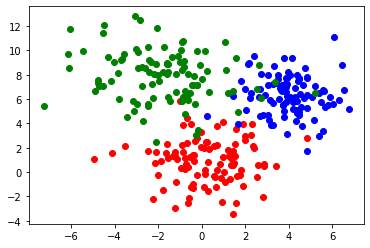

In [5]:
plt.scatter(x1,y1,color = 'r')
plt.scatter(x2,y2,color = 'b')
plt.scatter(x3,y3,color = 'g')
plt.show()

EM算法：

In [6]:
def calResponse(α , ϕ):
    
    #计算每个簇的响应值
    
    # α=[1x3] ; ϕ=[1x3]
    #return=[1x3]
    
    return np.multiply(α , ϕ) / np.dot(α , ϕ)

In [7]:
def calProb(data , μ , σ):
    
    #计算概率
    
    # μ=[1x2] ; σ=[1x2]
    
    return multivariate_normal.pdf(data , μ , np.diag(σ))

In [8]:
def cal_μ(data , γ):
    
    #更新参数 期望μ=[1x2]
    
    # γ=[1xN] ; data=[Nx2]
    
    return np.dot(γ , data)/γ.sum()

In [9]:
def cal_σ(data , γ , μ):
    
    #更新参数 方差σ=[1x2]
    
    # data=[Nx2] ; γ=[1xN] ; μ=[1X2]
    
    return np.dot(γ , np.square(data - μ))/γ.sum()

In [10]:
def EM(data , clusters , iterNum , ϵ):
    
    #clusters:中心点坐标 ; iterNum:最大迭代次数 ; ϵ:阈值
    
    #初始化迭代参数
    i = 0
    
    # μ=[3x2] ; σ=[3x2]
    μ = clusters
    σ = np.ones_like(μ)
    
    # γ=[Nx3] ; α=[1x3] ; ϕ=[Nx3]
    γ = np.ones((len(data) , len(clusters)))/len(clusters)
    α = np.ones(len(clusters))/len(clusters)
    ϕ = np.zeros((len(data) , len(clusters)))
    
    while 1:
        
        old = μ[0][0]
        
        #E循环
        for i in range(len(data)):
            for k in range(len(clusters)):
            
                ϕ[i][k] = calProb(data[i] , μ[k] , σ[k])
                γ[i] = calResponse(α , ϕ[i])
        
        #M循环
        for k in range(len(clusters)):
        
            μ[k] = cal_μ(data , γ.T[k])
            σ[k] = cal_σ(data , γ.T[k] , μ[k])
            α[k] = γ.T[k].sum() / len(data)
        
        #计算参数收敛度
        new = μ[0][0]
        diff = np.abs(new-old)
        
        i += 1
        
        if i >= iterNum:
            break
            
        if diff <= ϵ:        
            break
    
    return γ , μ , σ

In [11]:
clusters = [[0,0],[4,4],[-3,7]]

In [12]:
γ1 , μ1 , σ1 = EM(data , clusters , 200 , 1e-6)

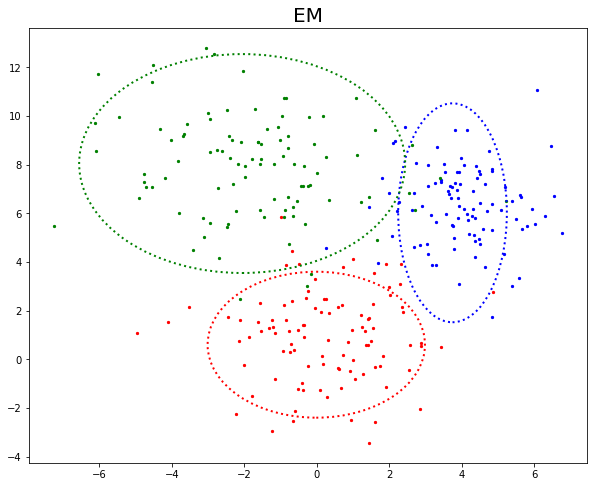

In [13]:
plt.figure(figsize=(10, 8))
plt.title('EM' ,fontsize = 20)
plt.scatter(x1, y1, color = 'r', s = 5)
plt.scatter(x2, y2, color = 'b', s = 5)
plt.scatter(x3, y3, color = 'g', s = 5)
ax = plt.gca()
colors = ['r', 'b', 'g']
for i in range(len(clusters)):
    plot_args = {'fc': 'None', 'lw': 2, 'edgecolor': colors[i], 'ls': ':'}
    ellipse = Ellipse(μ1[i], 3 * σ1[i][0], 3 * σ1[i][1], **plot_args)
    ax.add_patch(ellipse)
plt.show()